In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X = np.array([[4, 1, 2], [1, 2, 1], [2, 1, 1]])

np.corrcoef(X)

array([[ 1.        , -0.75592895,  0.94491118],
       [-0.75592895,  1.        , -0.5       ],
       [ 0.94491118, -0.5       ,  1.        ]])

In [3]:
R = 0.64963
N = 149

t_ = R * np.sqrt(N - 2) / np.sqrt(1 - R**2)

print(t_)

# get cdf
from scipy.stats import t

cdf1 = t.cdf(-t_, N - 2)
cdf2 = 1 - t.cdf(t_, N - 2)

print(cdf1 - cdf2)

10.360196919195428
1.587013493497451e-19


In [4]:
mu = [28.02, 4.91, 594]

rho = np.array([[4.42, 0.80, -0.40], [0.80, 1.10, -0.56], [-0.40, -0.56, 85]])

rho

array([[ 4.42,  0.8 , -0.4 ],
       [ 0.8 ,  1.1 , -0.56],
       [-0.4 , -0.56, 85.  ]])

In [21]:
# partial correlation given the other variable

def partial_corr_(i, j, k):
    return (rho[i, j] - rho[i, k] * rho[j, k]) / np.sqrt((1 - rho[i, k]**2) * (1 - rho[j, k]**2))

print(partial_corr_(0, 2, 1))

0.09656090991705363


In [42]:
sundhed_path = 'Data/stat2/stat2data/sundhed.fil'

# create pandas dataframe
sundhed = pd.read_csv(sundhed_path, sep=' ', header=None)
sundhed.columns = ['age', 'weight', 'run_time', 'oxygen', 'rest_pulse', 'run_pulse', 'max_pulse']

sundhed.head()

,age,weight,run_time,oxygen,rest_pulse,run_pulse,max_pulse
0,44,89.47,44.609,11.37,62,178,182
1,40,75.07,45.313,10.07,62,185,185
2,44,85.84,54.297,8.65,45,156,168
3,42,68.15,59.571,8.17,40,166,172
4,38,89.02,49.874,9.22,55,178,180


0.44868917571139944
0.4491510132599955


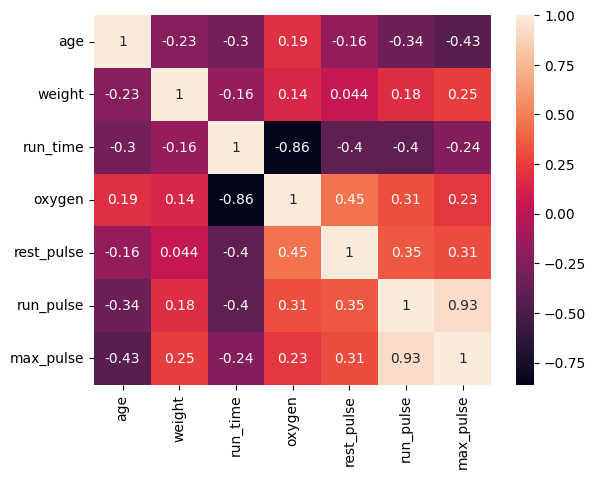

In [53]:
import seaborn as sns

#sns.pairplot(df)
sns.heatmap(sundhed.corr(), annot=True)

#x = rest
# y = oxygen
# z = weight

print((0.45 - 0.14 * 0.044) / np.sqrt((1 - 0.14**2) * (1 - 0.044**2)))

def partial_corr_conditional(x, y, z):
    #matrix = (np.corrcoef(x, y) - np.corrcoef(x, z) * np.corrcoef(y, z)) / np.sqrt((1 - np.corrcoef(x, z)**2) * (1 - np.corrcoef(y, z)**2))
    matrix = (np.corrcoef(x, y)[0, 1] - np.corrcoef(x, z)[0, 1] * np.corrcoef(y, z)[0, 1]) / np.sqrt((1 - np.corrcoef(x, z)[0, 1]**2) * (1 - np.corrcoef(y, z)[0, 1]**2))
    return matrix

print(partial_corr_conditional(sundhed['rest_pulse'], sundhed['oxygen'], sundhed['weight']))

In [ ]:
from sklearn.linear_model import LinearRegression

def partial_correlation(df, vars_of_interest, control_vars):
    residuals = {}
    for var in vars_of_interest:
        # Regress var on control_vars
        X = df[control_vars]
        y = df[var]
        model = LinearRegression().fit(X, y)
        residuals[var] = y - model.predict(X)
    
    # Create a DataFrame of residuals
    residual_df = pd.DataFrame(residuals)
    
    # Compute partial correlation matrix
    return residual_df.corr()

# Variables of interest and control variables
vars_of_interest = ['oxygen', 'run_time', 'rest_pulse', 'run_pulse', 'max_pulse']
control_vars = ['age', 'weight']

partial_corr_matrix = partial_correlation(sundhed, vars_of_interest, control_vars)
print("\nPartial Correlation Matrix:\n", partial_corr_matrix)


Partial Correlation Matrix:
               oxygen  run_time  rest_pulse  run_pulse  max_pulse
oxygen      1.000000 -0.854510    0.505606   0.396491   0.325428
run_time   -0.854510  1.000000   -0.492731  -0.551664  -0.405378
rest_pulse  0.505606 -0.492731    1.000000   0.321282   0.266090
run_pulse   0.396491 -0.551664    0.321282   1.000000   0.923542
max_pulse   0.325428 -0.405378    0.266090   0.923542   1.000000


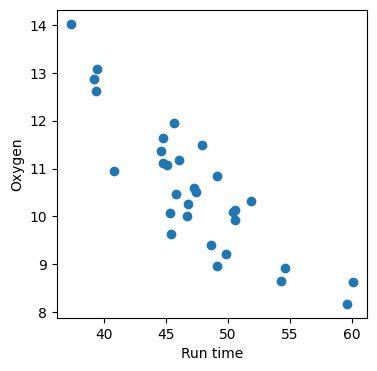

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.plot(sundhed['run_time'], sundhed['oxygen'], 'o')

ax.set_xlabel('Run time')
ax.set_ylabel('Oxygen')

plt.show()